# Dataset Overview & Descriptive Analysis 

imports

In [246]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler


# DATA EXPLORATION


In [247]:
%matplotlib inline
sns.set(style="whitegrid")

--Loading the Dataset--



In [248]:
df = pd.read_csv('../Data/healthcare-dataset-stroke-data.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


--shows the number of entries, column types, and non-null counts--

In [249]:
df.info()
#5110 entries and 12 columns
#bmi has null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


--Statistical Summary-- 
count:Number of non-null  entries in the column
mean:The average value
std:The standard deviation 
min:The smallest value
25%:The first quartile (25% of values are below this)
50%:(median)The middle value (half above, half below)
75%:The third quartile (75% of values are below this)
max:The largest value


In [250]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


--Number of Null values in each column--

In [251]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

--number of unique values in each column--

In [252]:
df.nunique()
#gender has 3 unique values, which is not expected



id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

--unique values in each column--


In [253]:
for i in df.columns:
    print("Number of Unique Values in ",i,':',df[i].nunique())
    print("Unique Values in ",i,':',df[i].unique()) if df[i].nunique()<10 else print()

Number of Unique Values in  id : 5110

Number of Unique Values in  gender : 3
Unique Values in  gender : ['Male' 'Female' 'Other']
Number of Unique Values in  age : 104

Number of Unique Values in  hypertension : 2
Unique Values in  hypertension : [0 1]
Number of Unique Values in  heart_disease : 2
Unique Values in  heart_disease : [1 0]
Number of Unique Values in  ever_married : 2
Unique Values in  ever_married : ['Yes' 'No']
Number of Unique Values in  work_type : 5
Unique Values in  work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Number of Unique Values in  Residence_type : 2
Unique Values in  Residence_type : ['Urban' 'Rural']
Number of Unique Values in  avg_glucose_level : 3979

Number of Unique Values in  bmi : 418

Number of Unique Values in  smoking_status : 4
Unique Values in  smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Number of Unique Values in  stroke : 2
Unique Values in  stroke : [1 0]


--Check for duplicated values--

In [254]:
df.duplicated().sum()
#No duplicate values

np.int64(0)

--Check for categorical columns--
(Categorical columns are columns where the values represent categories or groups, not continuous numbers)

In [255]:
#df.select_dtypes(include='object').columns :didnt work correctly(0,1 not included)
categorical_cols = [col for col in df.columns if df[col].nunique() < 10]
categorical_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

--percentage of patients who had a stroke--
(target variable distribution)

In [256]:
print(df['stroke'].value_counts())

df['stroke'].value_counts(normalize=True) * 100


stroke
0    4861
1     249
Name: count, dtype: int64


stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

-- check number of patients in each age group--

In [257]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 40, 60, 100], 
                         labels=['Child', 'Adult', 'Middle Age', 'Senior'])
df['age_group'].value_counts()


age_group
Middle Age    1562
Adult         1328
Senior        1304
Child          916
Name: count, dtype: int64

--Check how many values are zero--

In [258]:
(df[['age', 'bmi', 'avg_glucose_level']] == 0).sum()
#zero is invalid value for age, bmi and avg_glucose_level

age                  0
bmi                  0
avg_glucose_level    0
dtype: int64

--Stroke count by work type--

In [259]:
pd.crosstab(df['work_type'], df['stroke'])


stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


--Stroke ratio by smoking status--

In [260]:
pd.crosstab(df['smoking_status'], df['stroke'], normalize='index') * 100
#smoking status is not a good predictor of stroke

stroke,0,1
smoking_status,,
Unknown,96.955959,3.044041
formerly smoked,92.090395,7.909605
never smoked,95.243129,4.756871
smokes,94.676806,5.323194


--Stroke count by gender--

In [261]:
pd.crosstab(df['gender'], df['stroke'])


stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


--stroke ratio by age group--

In [262]:

df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 18, 40, 60, 100],
    labels=['Child', 'Adult', 'Middle Age', 'Senior']
)

stroke_ratio = pd.crosstab(df['age_group'], df['stroke'], normalize='index')

stroke_ratio.columns = ['No Stroke', 'Stroke']

print(" Stroke Rate by Custom Age Group (%):")
print(stroke_ratio.round(3))



 Stroke Rate by Custom Age Group (%):
            No Stroke  Stroke
age_group                    
Child           0.998   0.002
Adult           0.995   0.005
Middle Age      0.959   0.041
Senior          0.864   0.136


--Check correlation of each numeric feature with the target--

In [263]:

df.corr(numeric_only=True)['stroke'].sort_values(ascending=False)
#Values range from -1(prefect negative correleation) to +1(perfect positive correleation)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

# Data visualization

Correlation Heatmap

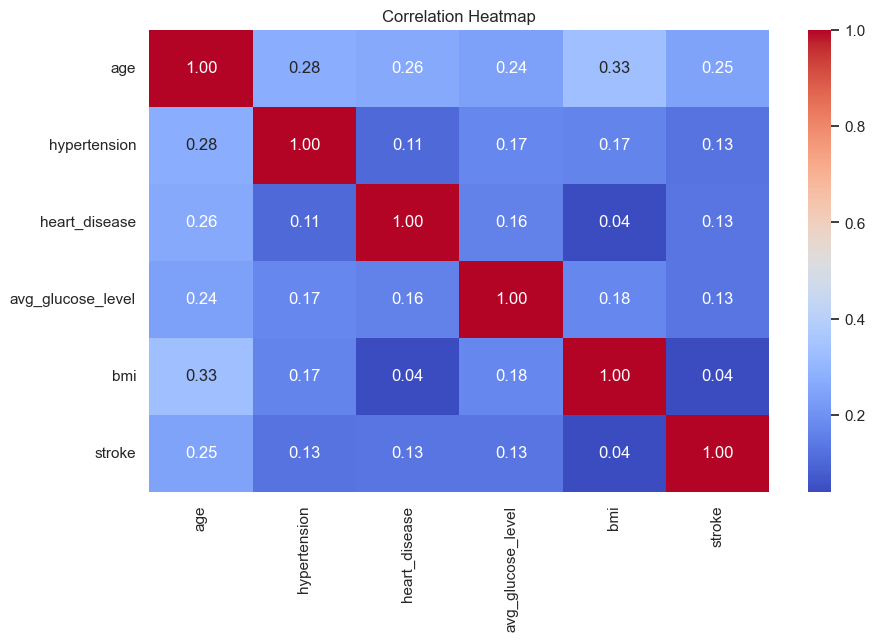

In [264]:

# numerical features without id
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Scatter Plots

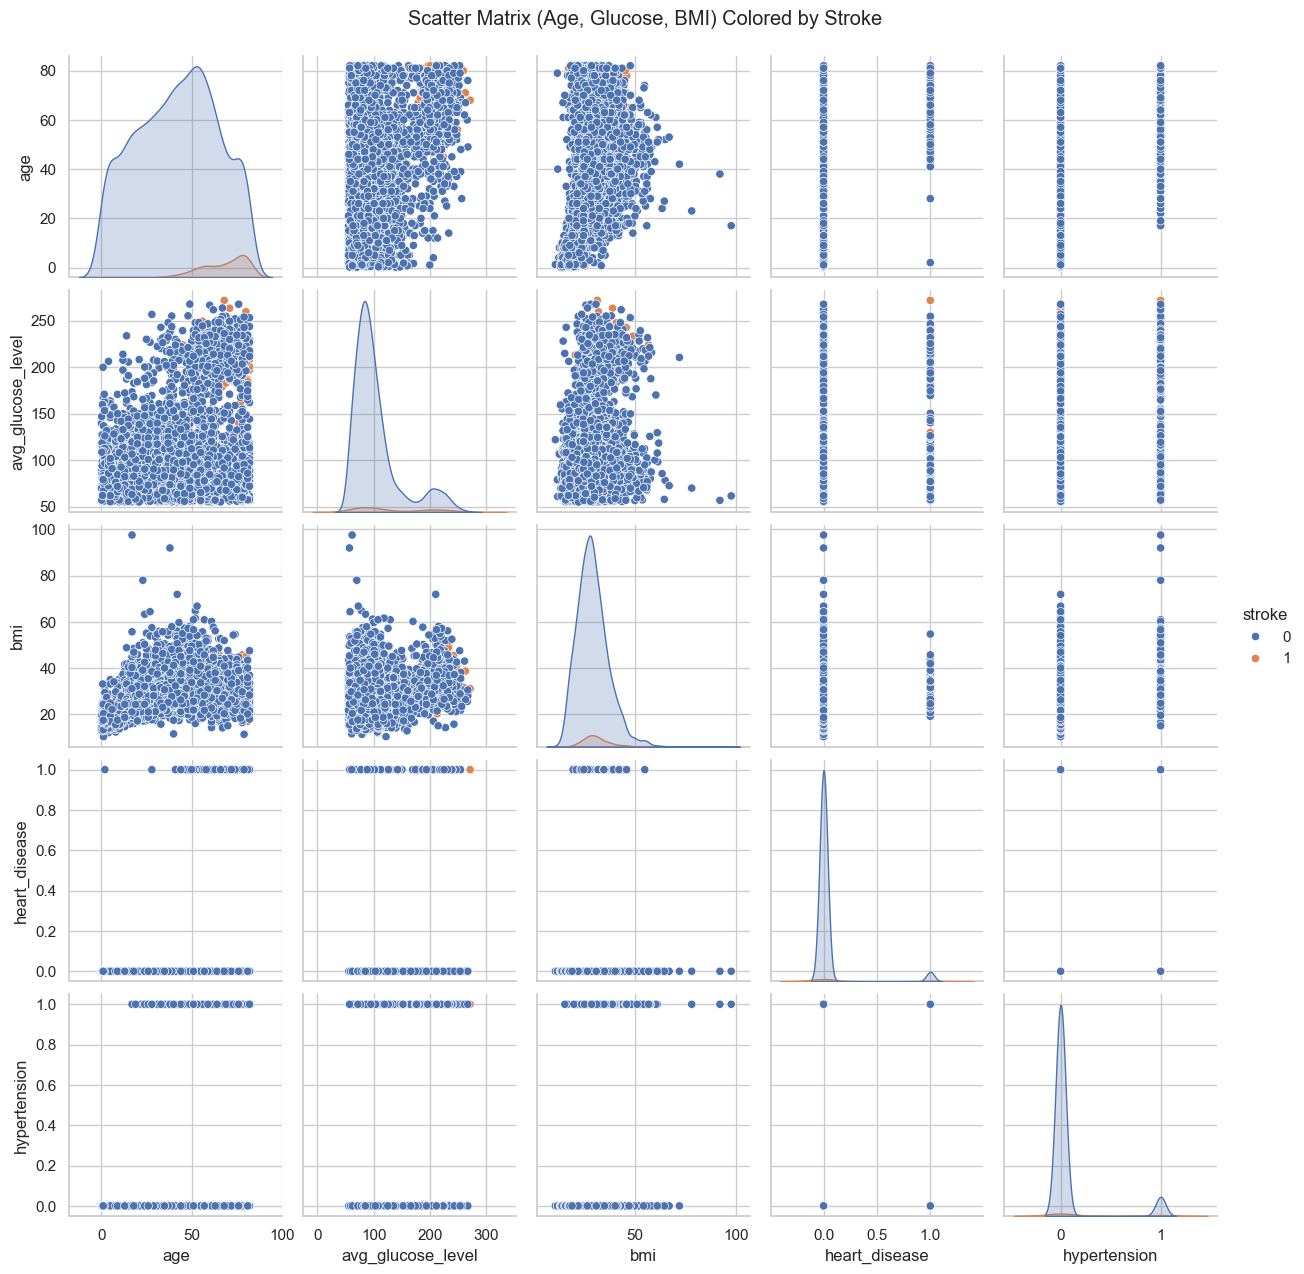

In [265]:
scatter_features = ['age', 'avg_glucose_level', 'bmi','heart_disease','hypertension'] #numerical values only
#  pairplot with stroke as hue
pairplot = sns.pairplot(df[scatter_features + ['stroke']].dropna(), hue='stroke', diag_kind='kde')
pairplot.fig.suptitle("Scatter Matrix (Age, Glucose, BMI) Colored by Stroke", y=1.02)

pairplot.savefig("../visuals/scatter_matrix_cleaned.png")
plt.show()

saving each plot in visuals file for better visualization

In [266]:
features = ['age', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease']
# Generate scatter plots for all unique pairs
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        x = features[i]
        y = features[j]
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=x, y=y, hue='stroke', data=df)
        plt.title(f"{x.capitalize()} vs {y.capitalize()} Colored by Stroke")
        
        # Save without showing
        filename = f"scatter_{x}_vs_{y}.png"
        plt.savefig(f"../visuals/{filename}")
        plt.close()

Box plot

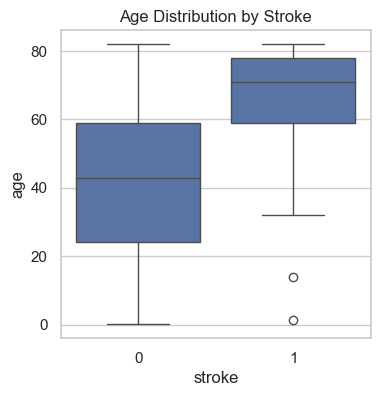

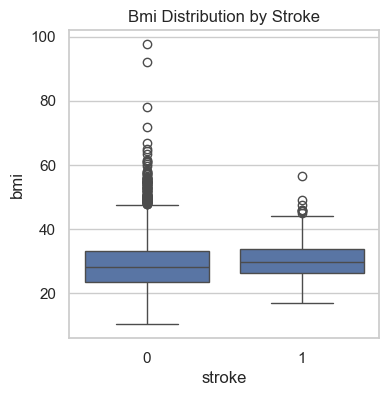

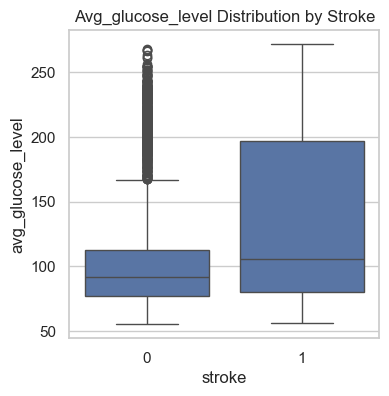

In [267]:
# Features to visualize
features = ['age', 'bmi', 'avg_glucose_level']

# Loop through and save each box plot
for feature in features:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='stroke', y=feature, data=df)
    plt.title(f"{feature.capitalize()} Distribution by Stroke")
    plt.savefig(f"../visuals/boxplot_{feature}_by_stroke.png")
    plt.show()

Count plot

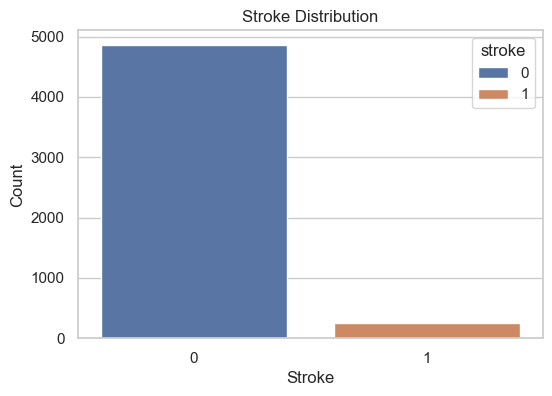

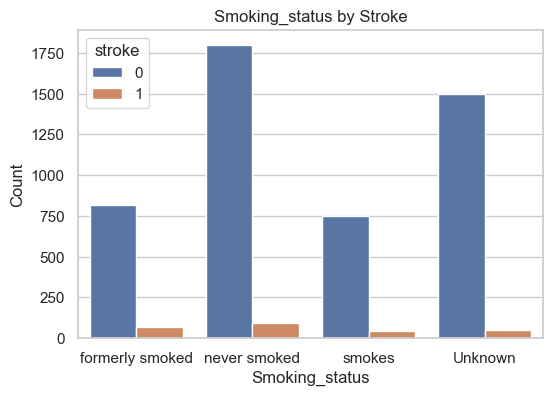

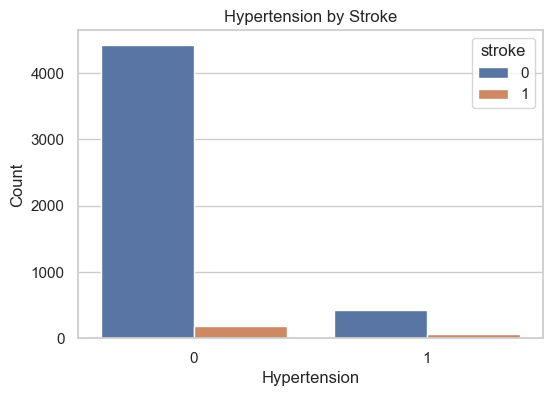

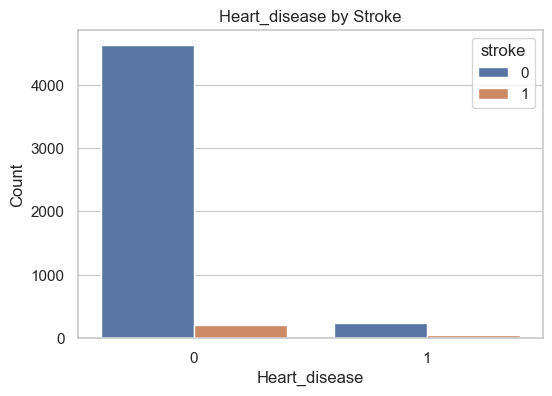

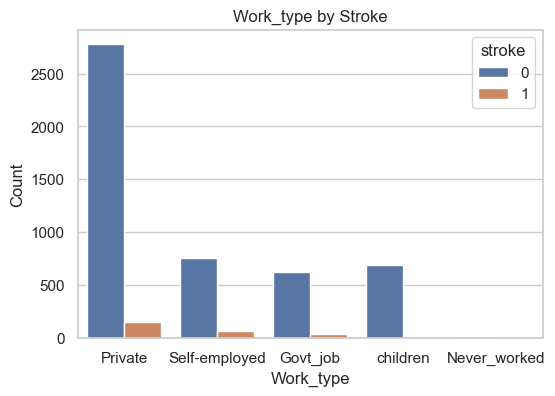

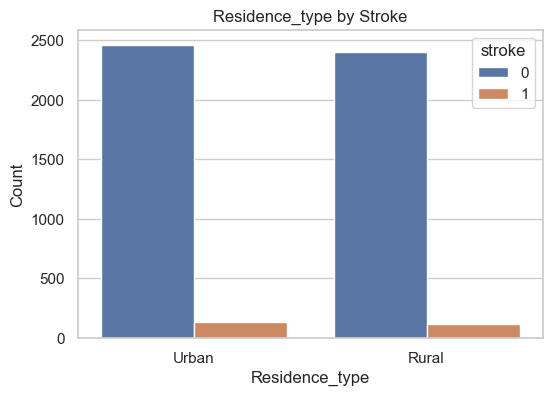

In [268]:
# List of features to visualize in count plots
features = ['stroke', 'smoking_status', 'hypertension', 'heart_disease', 'work_type', 'Residence_type']

# Loop through each feature and plot the count plot
for feature in features:
    plt.figure(figsize=(6, 4))  # Optional: adjust the size of the plot
    sns.countplot(x=feature, hue='stroke', data=df)
    plt.title(f'{feature.capitalize()} by Stroke' if feature != 'stroke' else 'Stroke Distribution')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    
    # Display the plot
    plt.show()


Histogram

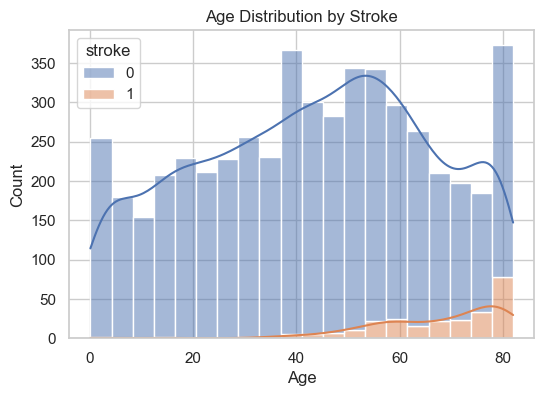

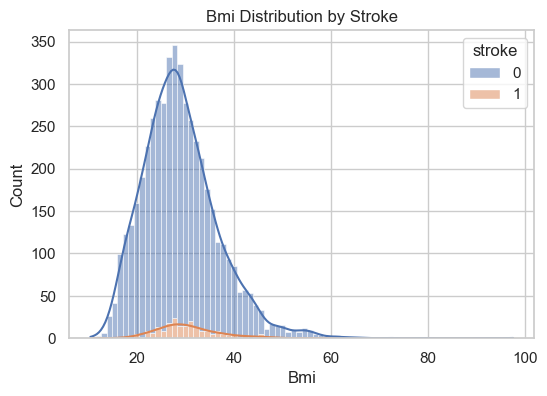

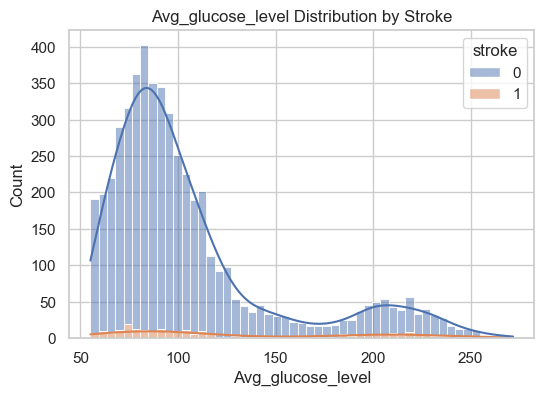

In [269]:

# List of features to visualize in histogram and KDE plots
features = ['age', 'bmi', 'avg_glucose_level']

# Loop through each feature and plot the histogram / KDE plot
for feature in features:
    plt.figure(figsize=(6, 4))  
    sns.histplot(data=df, x=feature, hue='stroke', multiple='stack', kde=True)
    plt.title(f'{feature.capitalize()} Distribution by Stroke')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.savefig(f"../visuals/histplot_{feature}_by_stroke.png")
    plt.show()


violin plots

C:\Users\User\AppData\Local\Temp\ipykernel_26816\1055150602.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y=feature, data=df, inner='quartile', palette='muted')


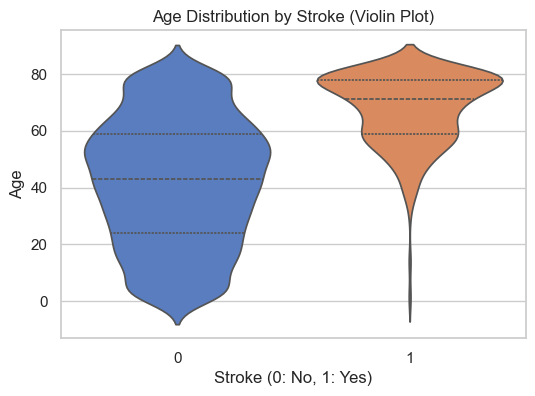

C:\Users\User\AppData\Local\Temp\ipykernel_26816\1055150602.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y=feature, data=df, inner='quartile', palette='muted')


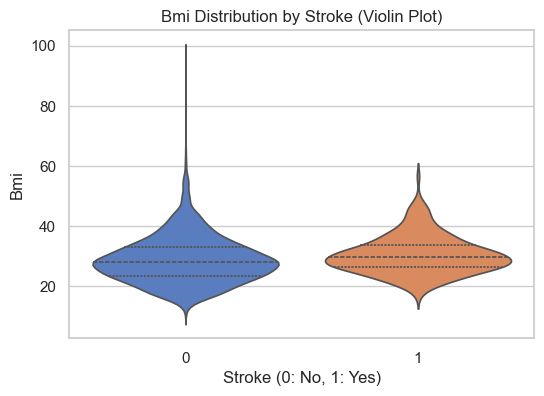

C:\Users\User\AppData\Local\Temp\ipykernel_26816\1055150602.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y=feature, data=df, inner='quartile', palette='muted')


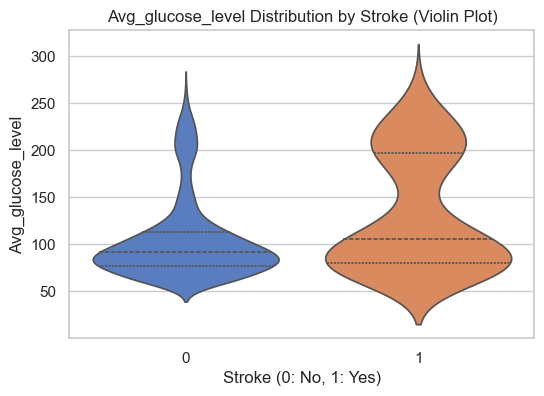

In [270]:
# Features to visualize with violin plots
features = ['age', 'bmi', 'avg_glucose_level']

# Loop through and save each violin plot
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='stroke', y=feature, data=df, inner='quartile', palette='muted')
    plt.title(f"{feature.capitalize()} Distribution by Stroke (Violin Plot)")
    plt.xlabel('Stroke (0: No, 1: Yes)')
    plt.ylabel(feature.capitalize())
    
    # Save the plot to a file
    plt.savefig(f"../visuals/violinplot_{feature}_by_stroke.png")
    
    # Display the plot
    plt.show()


pie charts

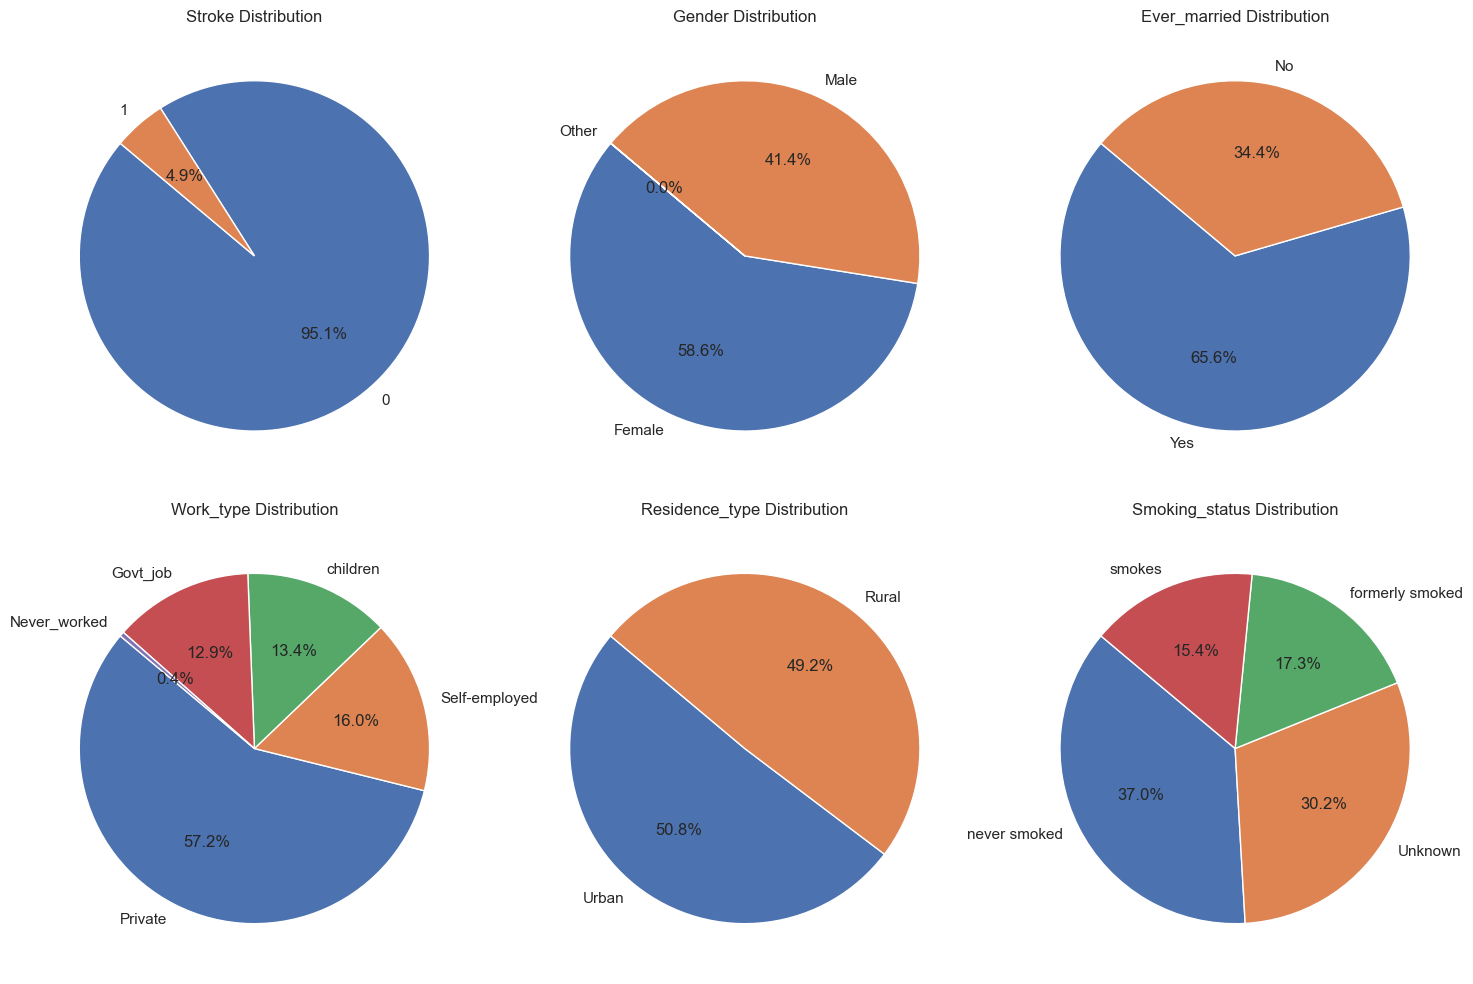

In [271]:
# Features to generate pie charts for
features = ['stroke','gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Setup subplot grid (2 rows, 3 columns to fit 5 features)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Create pie charts
for i, feature in enumerate(features):
    counts = df[feature].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{feature.capitalize()} Distribution')
    axes[i].axis('equal')  # Keep the pie chart round

# Hide the empty sixth subplot (if there is one)
if len(features) < len(axes):
    axes[-1].axis('off')

# Adjust layout and save
plt.tight_layout()
plt.show()


# LDA

In [272]:

# Define the features and target variable
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Clean the dataset by dropping rows with missing values
df_clean = df[features + ['stroke']].dropna()

X = df_clean[features]
y = df_clean['stroke'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)  
X_lda = lda.fit_transform(X_scaled, y)

print(f"Explained variance ratio: {lda.explained_variance_ratio_}")

coef = pd.DataFrame(
    lda.coef_,
    columns=features,
    index=['LD1']
).T

Explained variance ratio: [1.]


In [273]:

lda_direction = lda.coef_[0]
lda_direction = lda_direction / np.linalg.norm(lda_direction)

X_orthogonal = X_scaled - np.outer(X_lda.flatten(), lda_direction)

pca_orthogonal = PCA(n_components=1)
X_lda_2d = pca_orthogonal.fit_transform(X_orthogonal)

X_lda_2d = np.column_stack((X_lda, X_lda_2d))

# Create LDA DataFrame for visualization
lda_df = pd.DataFrame(data=X_lda_2d, columns=['LD1', 'LD2'])
lda_df['stroke'] = df['stroke'].reset_index(drop=True)

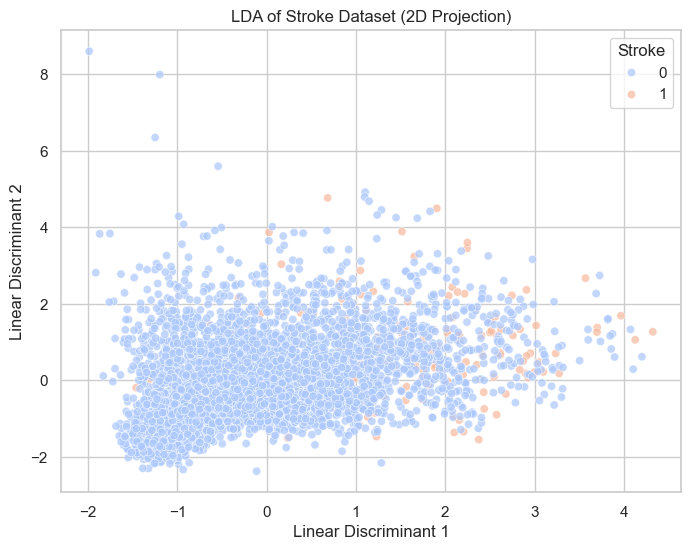

In [274]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='LD1', y='LD2',
    hue='stroke',
    data=lda_df,
    palette='coolwarm',
    alpha=0.7
)
plt.title('LDA of Stroke Dataset (2D Projection)')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='Stroke')
plt.grid(True)
plt.show()

# PCA


--Preparing the Data--

In [275]:
# Select numeric features (exclude 'id', target 'stroke', and maybe 'age_group' or any categorical)
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Drop rows with missing values (if any)
df_clean = df[features + ['stroke']].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features].values)


--Apply PCA to reduce to 2 dimensions--

In [276]:
# Create PCA model
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)


--Create a DataFrame for visualization--

In [277]:
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['stroke'] = df_clean['stroke'].values


--visualize with seaborn--

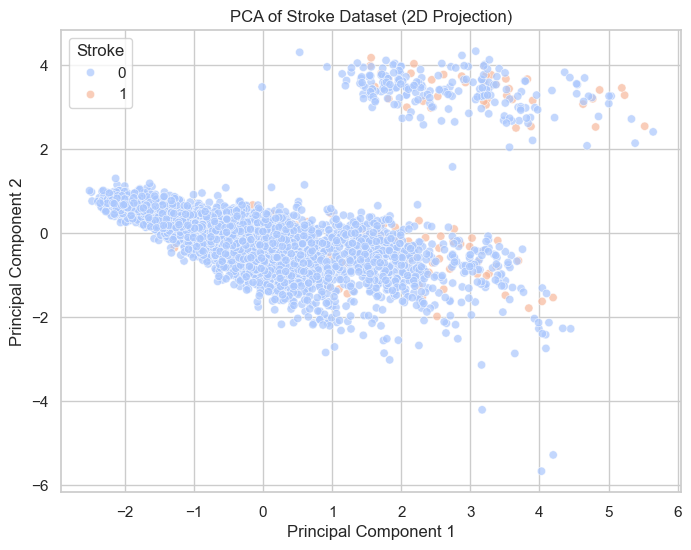

In [278]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='stroke',
    data=pca_df,
    palette='coolwarm',
    alpha=0.7
)
plt.title('PCA of Stroke Dataset (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Stroke')
plt.grid(True)
plt.show()


# Data Cleaning And Preprocessing


# Handling missing values

In [279]:
#checking for missing values in all
df.isnull().sum()
#Only bmi has missing values


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
age_group              0
dtype: int64

In [280]:
#checking unique values in all columns
for i in df.columns:
    print("Number of Unique Values in ",i,':',df[i].nunique())
    print("Unique Values in ",i,':',df[i].unique()) if df[i].nunique()<10 else print()
    #to check if there is any invalid values

Number of Unique Values in  id : 5110

Number of Unique Values in  gender : 3
Unique Values in  gender : ['Male' 'Female' 'Other']
Number of Unique Values in  age : 104

Number of Unique Values in  hypertension : 2
Unique Values in  hypertension : [0 1]
Number of Unique Values in  heart_disease : 2
Unique Values in  heart_disease : [1 0]
Number of Unique Values in  ever_married : 2
Unique Values in  ever_married : ['Yes' 'No']
Number of Unique Values in  work_type : 5
Unique Values in  work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Number of Unique Values in  Residence_type : 2
Unique Values in  Residence_type : ['Urban' 'Rural']
Number of Unique Values in  avg_glucose_level : 3979

Number of Unique Values in  bmi : 418

Number of Unique Values in  smoking_status : 4
Unique Values in  smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Number of Unique Values in  stroke : 2
Unique Values in  stroke : [1 0]
Number of Unique Values in  age

In [281]:

# Check for zero or negative values in 'age', 'bmi', and 'avg_glucose_level' (these are the numerical values)
print((df[['age', 'bmi', 'avg_glucose_level']] <= 0).sum())


age                  0
bmi                  0
avg_glucose_level    0
dtype: int64


In [282]:
#correlation before handling missing data
correlation_before = df[['bmi', 'stroke']].corr()
print("Correlation between BMI and Stroke before handling missing data:\n", correlation_before)

Correlation between BMI and Stroke before handling missing data:
              bmi    stroke
bmi     1.000000  0.042374
stroke  0.042374  1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_26816\1758860936.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='coolwarm')


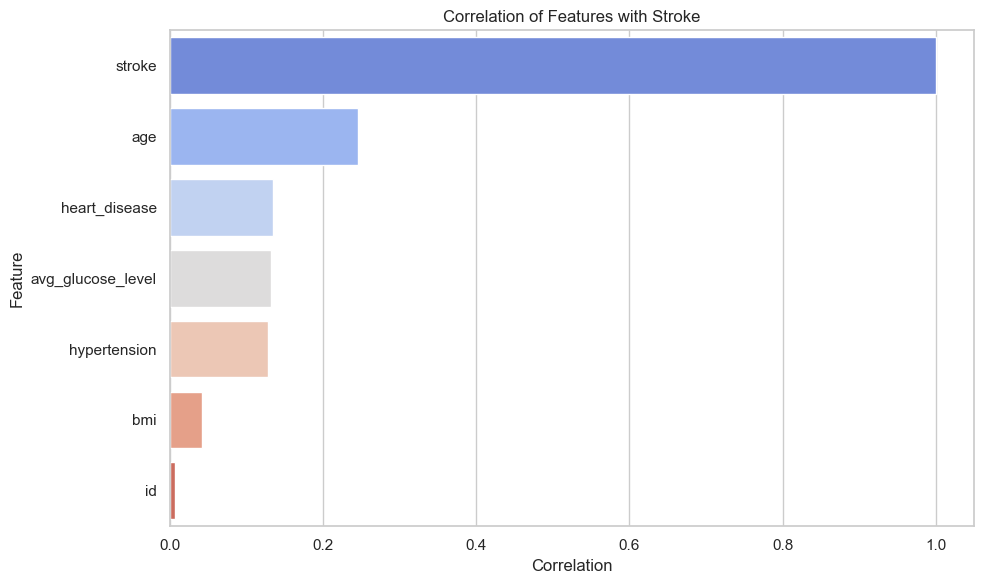

In [283]:
# Calculate correlation of all columns with 'stroke'
correlation_with_stroke = df.corr(numeric_only=True)['stroke'].sort_values(ascending=False)

# Create a DataFrame for visualization
correlation_df = correlation_with_stroke.reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='coolwarm')
plt.title('Correlation of Features with Stroke')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


--only bmi has missing values--
we will try filling them with mean and with median
then getting correleation with target column (stroke) and see which approach gives best correlation

--mean--

In [284]:
# Create a copy of the DataFrame
df_mean_bmi = df.copy()

# Replacing missing values in the 'bmi' column with the mean
df_mean_bmi['bmi'] = df_mean_bmi['bmi'].fillna(df_mean_bmi['bmi'].mean())
print("Mean BMI after dropping null values:", df_mean_bmi['bmi'].mean())
#didnt need to remove missing values before calculating mean as mean function ignores null values by default



Mean BMI after dropping null values: 28.893236911794663


In [285]:
#correlation after filling with mean
correlation_mean = df_mean_bmi[['bmi', 'stroke']].corr()
print("🔍 Correlation between BMI and Stroke after mean filling:\n", correlation_mean)


🔍 Correlation between BMI and Stroke after mean filling:
              bmi    stroke
bmi     1.000000  0.038947
stroke  0.038947  1.000000


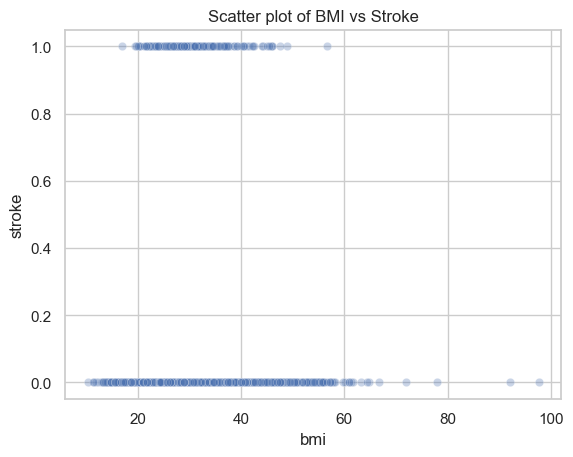

In [286]:
sns.scatterplot(data=df_mean_bmi, x='bmi', y='stroke', alpha=0.3)
plt.title('Scatter plot of BMI vs Stroke')
plt.show()
#doesnt explain it very well

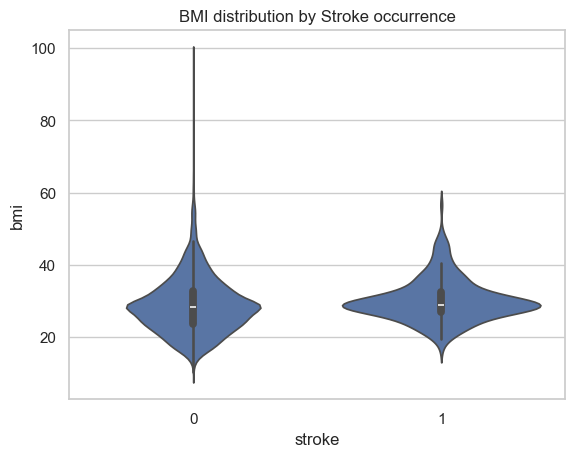

In [287]:
sns.violinplot(data=df_mean_bmi, x='stroke', y='bmi')
plt.title('BMI distribution by Stroke occurrence')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_26816\2463343681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_mean.index, y=correlation_mean['stroke'].values, palette='coolwarm')


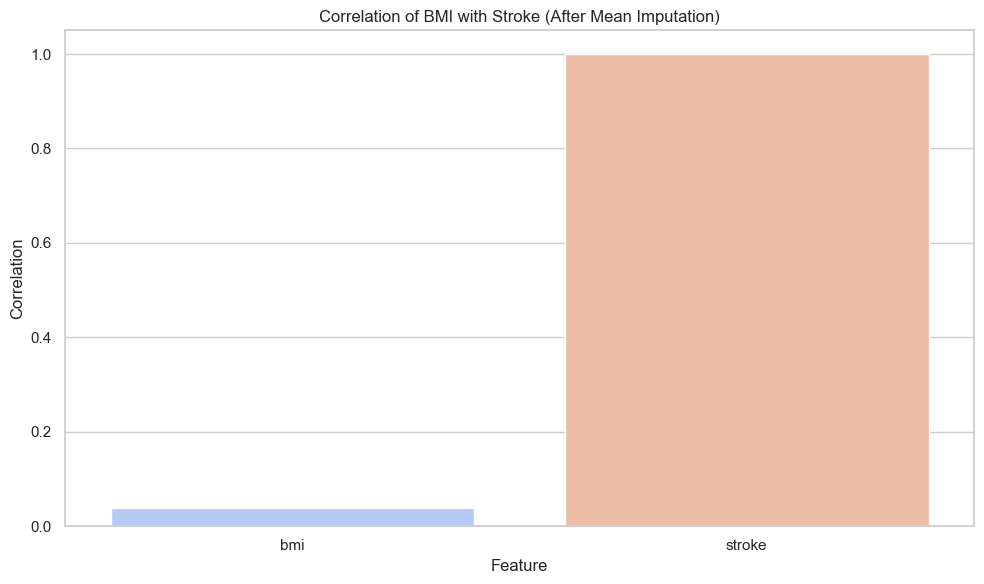

In [288]:
# Plot the correlation as a bar chart after mean 
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_mean.index, y=correlation_mean['stroke'].values, palette='coolwarm')
plt.title('Correlation of BMI with Stroke (After Mean Imputation)')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_26816\3042134789.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Correlation Type", y="Correlation", data=difference_df, palette="viridis")


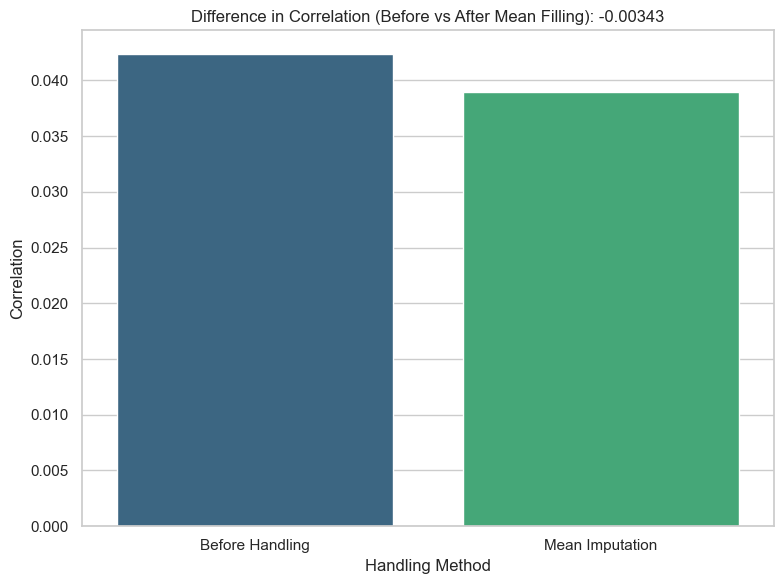

In [289]:
# Create a new DataFrame with the required rows
correlation_values = {
	"Correlation Type": ["Before Handling", "Mean Imputation"],
	"Correlation": [correlation_before.loc["bmi", "stroke"], correlation_mean.loc["bmi", "stroke"]]
}
difference_df = pd.DataFrame(correlation_values)

# Calculate the difference in correlation
correlation_difference = difference_df.loc[difference_df["Correlation Type"] == "Mean Imputation", "Correlation"].values[0] - \
						 difference_df.loc[difference_df["Correlation Type"] == "Before Handling", "Correlation"].values[0]

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x="Correlation Type", y="Correlation", data=difference_df, palette="viridis")
plt.title(f"Difference in Correlation (Before vs After Mean Filling): {correlation_difference:.5f}")
plt.ylabel("Correlation")
plt.xlabel("Handling Method")
plt.tight_layout()
plt.show()

-- median filling--

In [290]:
# Create a copy of the DataFrame
df_median_bmi = df.copy()

# Replacing missing values in the 'bmi' column with the median
df_median_bmi['bmi'] = df_median_bmi['bmi'].fillna(df_median_bmi['bmi'].median())

# Print the median BMI after filling missing values
print("Median BMI after dropping null values:", df_median_bmi['bmi'].median())


Median BMI after dropping null values: 28.1


In [291]:
correlation_median = df_median_bmi[['bmi', 'stroke']].corr()
print(" Correlation (bmi vs stroke) after median fill:\n", correlation_median)


 Correlation (bmi vs stroke) after median fill:
             bmi   stroke
bmi     1.00000  0.03611
stroke  0.03611  1.00000


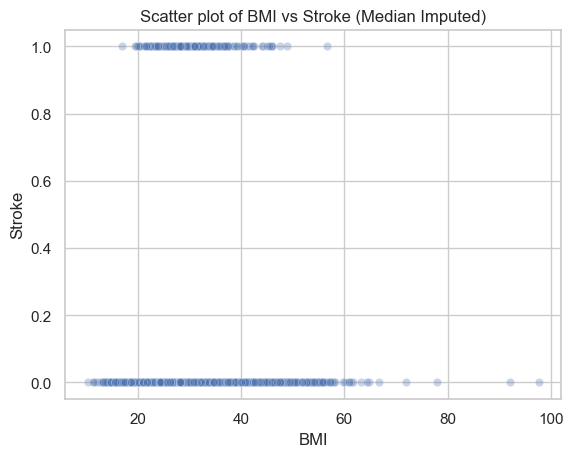

In [292]:
sns.scatterplot(data=df_median_bmi, x='bmi', y='stroke', alpha=0.3)
plt.title('Scatter plot of BMI vs Stroke (Median Imputed)')
plt.xlabel('BMI')
plt.ylabel('Stroke')
plt.show()

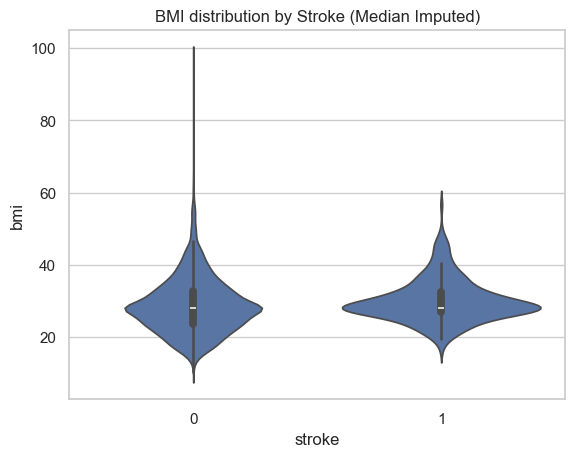

In [293]:

# Plot the violin plot
sns.violinplot(data=df_median_bmi, x='stroke', y='bmi')
plt.title('BMI distribution by Stroke (Median Imputed)')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_26816\2140723911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_median.index, y=correlation_median['stroke'].values, palette='coolwarm')


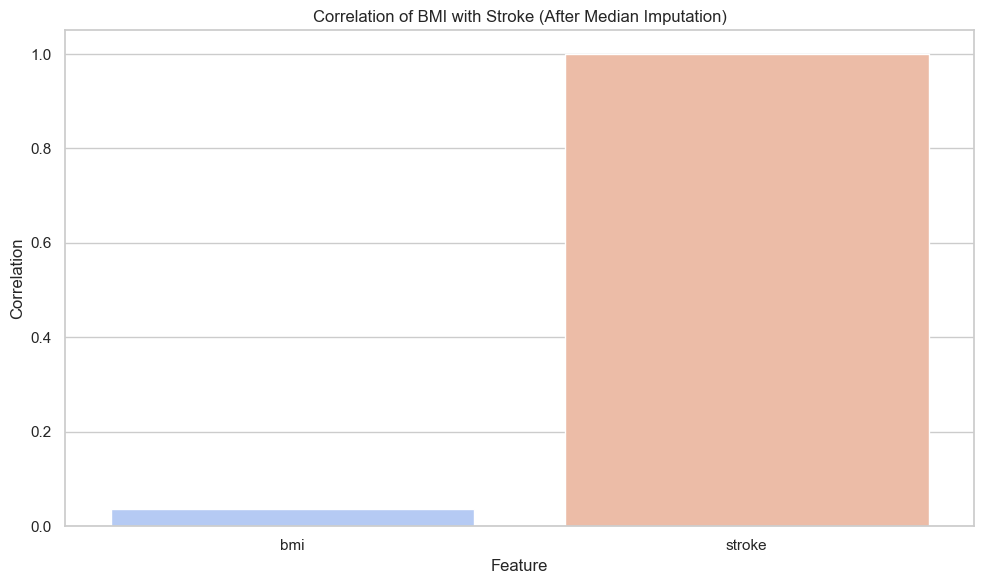

In [294]:
# Plot the correlation as a bar chart after mean 
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_median.index, y=correlation_median['stroke'].values, palette='coolwarm')
plt.title('Correlation of BMI with Stroke (After Median Imputation)')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_26816\3086321986.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Correlation Type", y="Correlation", data=difference_df, palette="viridis")


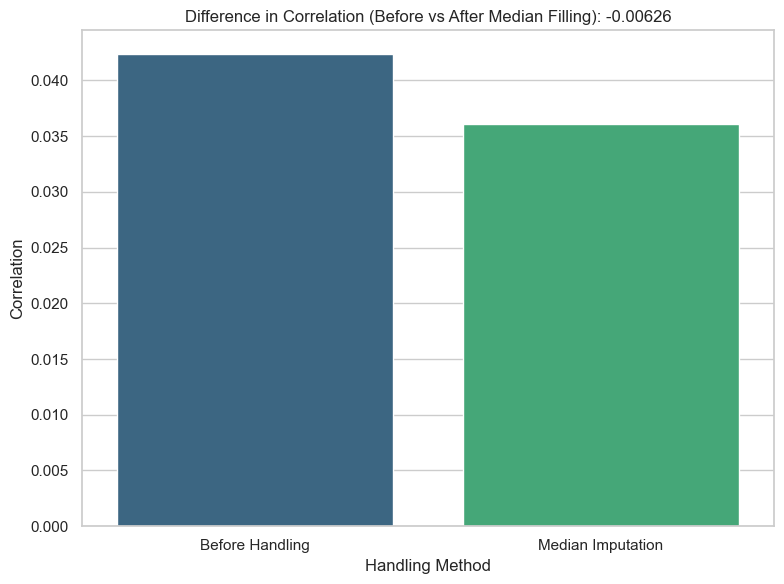

In [295]:
# Create a new DataFrame with the required rows
correlation_values = {
	"Correlation Type": ["Before Handling", "Median Imputation"],
	"Correlation": [correlation_before.loc["bmi", "stroke"], correlation_median.loc["bmi", "stroke"]]
}
difference_df = pd.DataFrame(correlation_values)

# Calculate the difference in correlation
correlation_difference = difference_df.loc[difference_df["Correlation Type"] == "Median Imputation", "Correlation"].values[0] - \
						 difference_df.loc[difference_df["Correlation Type"] == "Before Handling", "Correlation"].values[0]

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x="Correlation Type", y="Correlation", data=difference_df, palette="viridis")
plt.title(f"Difference in Correlation (Before vs After Median Filling): {correlation_difference:.5f}")
plt.ylabel("Correlation")
plt.xlabel("Handling Method")
plt.tight_layout()
plt.show()

In [296]:
print("Mean BMI:", df['bmi'].mean())
print("Median BMI:", df['bmi'].median())
#compare mean and median to understand why correlation is very close  

Mean BMI: 28.893236911794666
Median BMI: 28.1


mean and median replacement gave very close values
(both worse than before handling)

--dropping rows with missing bmis--

In [297]:
df_dropna_bmi = df.copy()
df_dropna_bmi = df_dropna_bmi.dropna(subset=['bmi'])


In [298]:
#confirming
print("Missing BMI values:", df_dropna_bmi['bmi'].isnull().sum())


Missing BMI values: 0


In [299]:
correlation_dropna = df_dropna_bmi[['bmi', 'stroke']].corr()
print(" Correlation (bmi vs stroke) after dropping NaNs:\n", correlation_dropna)


 Correlation (bmi vs stroke) after dropping NaNs:
              bmi    stroke
bmi     1.000000  0.042374
stroke  0.042374  1.000000


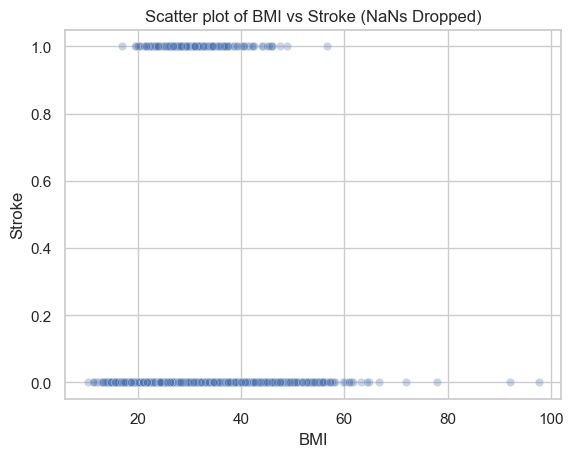

In [300]:
sns.scatterplot(data=df_dropna_bmi, x='bmi', y='stroke', alpha=0.3)
plt.title('Scatter plot of BMI vs Stroke (NaNs Dropped)')
plt.xlabel('BMI')
plt.ylabel('Stroke')
plt.show()


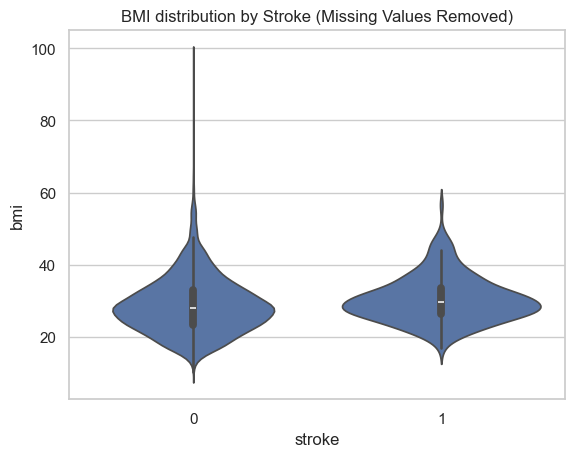

In [301]:


# Plot the violin plot
sns.violinplot(data=df_dropna_bmi, x='stroke', y='bmi')
plt.title('BMI distribution by Stroke (Missing Values Removed)')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_26816\1917146168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_dropna.index, y=correlation_dropna['stroke'].values, palette='coolwarm')


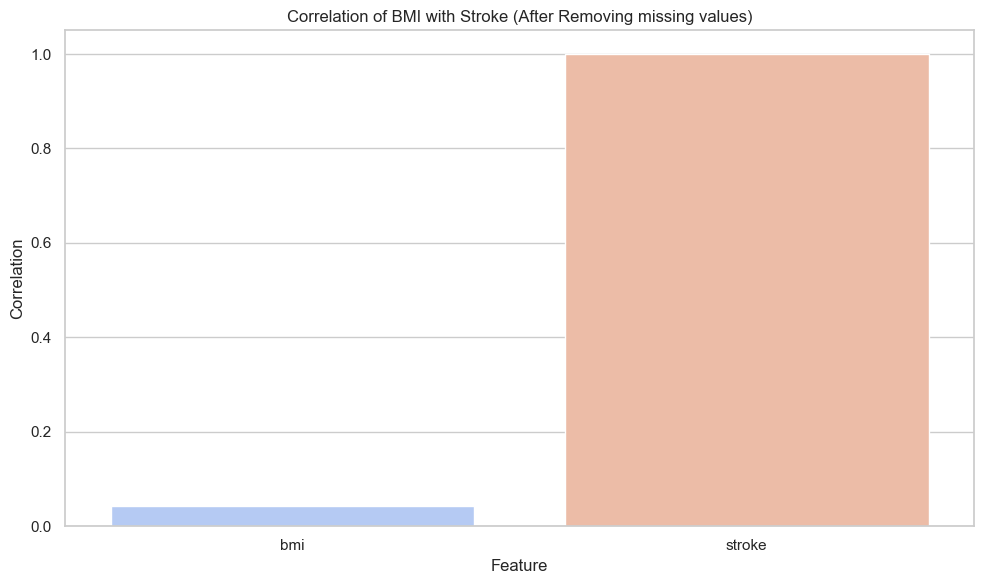

In [302]:
# Plot the correlation as a bar chart after mean 
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_dropna.index, y=correlation_dropna['stroke'].values, palette='coolwarm')
plt.title('Correlation of BMI with Stroke (After Removing missing values)')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_26816\952762596.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Correlation Type", y="Correlation", data=difference_df, palette="viridis")


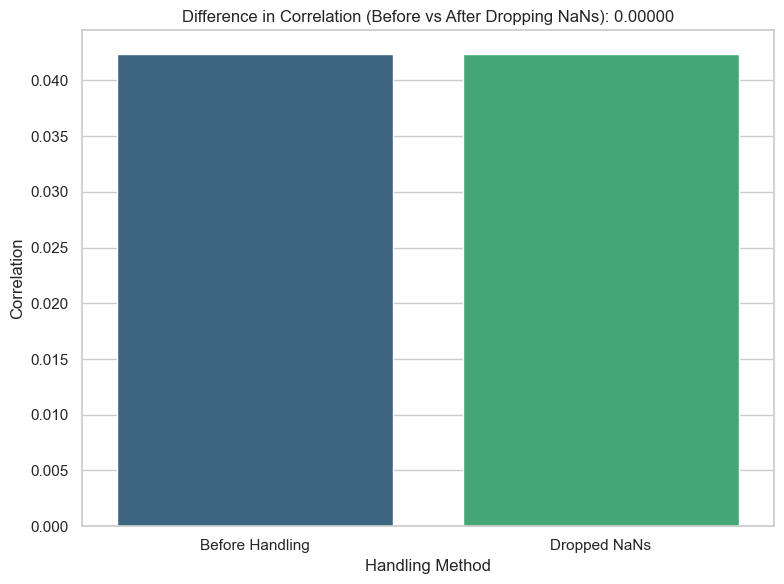

In [303]:
# Ensure the correlation values for "Dropped NaNs" are available
correlation_values = {
	"Correlation Type": ["Before Handling", "Dropped NaNs"],
	"Correlation": [correlation_before.loc["bmi", "stroke"], correlation_dropna.loc["bmi", "stroke"]]
}

# Create a DataFrame for visualization
difference_df = pd.DataFrame(correlation_values)

# Calculate the difference in correlation
correlation_difference = difference_df.loc[difference_df["Correlation Type"] == "Dropped NaNs", "Correlation"].values[0] - \
						 difference_df.loc[difference_df["Correlation Type"] == "Before Handling", "Correlation"].values[0]

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x="Correlation Type", y="Correlation", data=difference_df, palette="viridis")
plt.title(f"Difference in Correlation (Before vs After Dropping NaNs): {correlation_difference:.5f}")
plt.ylabel("Correlation")
plt.xlabel("Handling Method")
plt.tight_layout()
plt.show()

Now we compare between the 3 methods and before handling

C:\Users\User\AppData\Local\Temp\ipykernel_26816\1478023987.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df.index, y=correlation_df['Correlation'], palette='viridis')


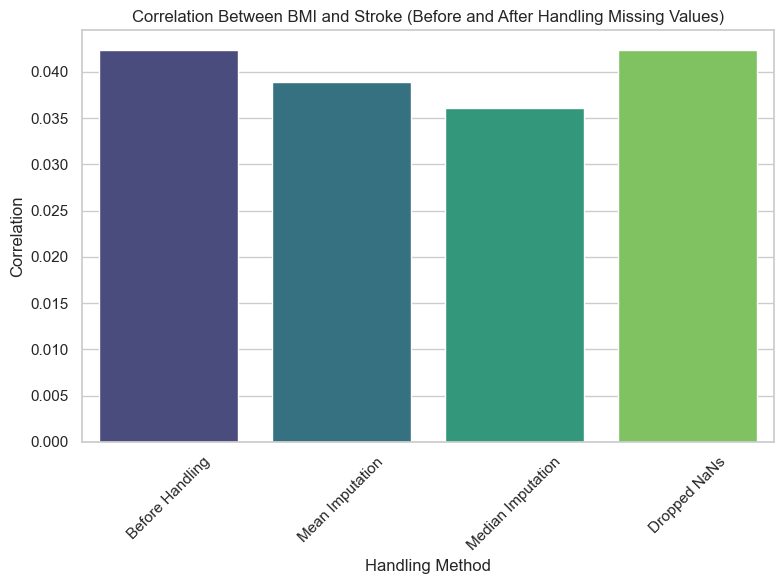

In [304]:


# Prepare data for plotting
correlation_values = {
    "Before Handling": correlation_before.loc['bmi', 'stroke'],
    "Mean Imputation": correlation.loc['bmi', 'stroke'],
    "Median Imputation": corr_median.loc['bmi', 'stroke'],
    "Dropped NaNs": correlation_dropna.loc['bmi', 'stroke']
}

# Create a DataFrame for visualization
correlation_df = pd.DataFrame.from_dict(correlation_values, orient='index', columns=['Correlation'])

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_df.index, y=correlation_df['Correlation'], palette='viridis')
plt.title('Correlation Between BMI and Stroke (Before and After Handling Missing Values)')
plt.ylabel('Correlation')
plt.xlabel('Handling Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_26816\1438389397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


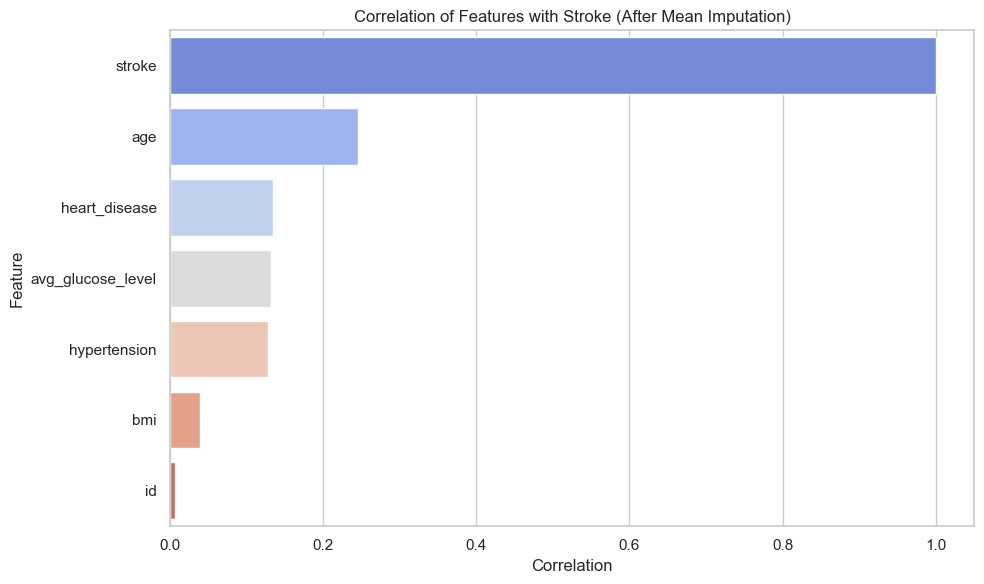

In [305]:
#checking to see if other values are affected
# Calculate correlation of features with stroke for df_median_bmi

correlation_with_stroke_mean = df_mean_bmi.corr(numeric_only=True)['stroke'].sort_values(ascending=False)

# Plot the correlation as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_stroke_mean.values,
    y=correlation_with_stroke_mean.index,
    palette='coolwarm'
)
plt.title('Correlation of Features with Stroke (After Mean Imputation)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_26816\656993731.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


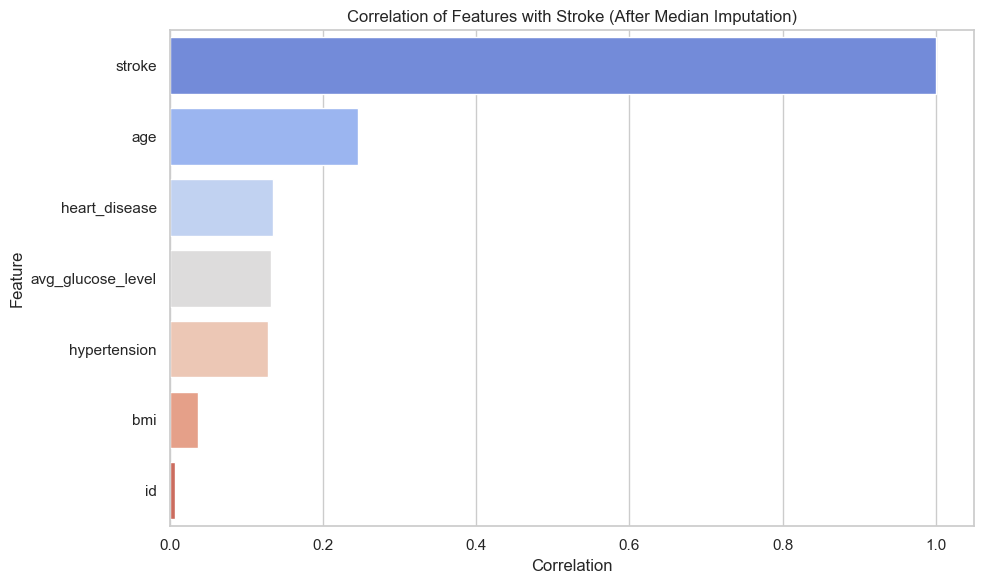

In [306]:
#checking to see if other values are affected
# Calculate correlation of features with stroke for df_median_bmi

correlation_with_stroke_median = df_median_bmi.corr(numeric_only=True)['stroke'].sort_values(ascending=False)

# Plot the correlation as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_stroke_median.values,
    y=correlation_with_stroke_median.index,
    palette='coolwarm'
)
plt.title('Correlation of Features with Stroke (After Median Imputation)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [307]:
#correlation_mean_handling = df_mean_bmi.corr(numeric_only=True)['stroke'].sort_values(ascending=False)
#print("Correlation between all columns and stroke (Mean Handling):\n", correlation_mean_handling)

C:\Users\User\AppData\Local\Temp\ipykernel_26816\3171997126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


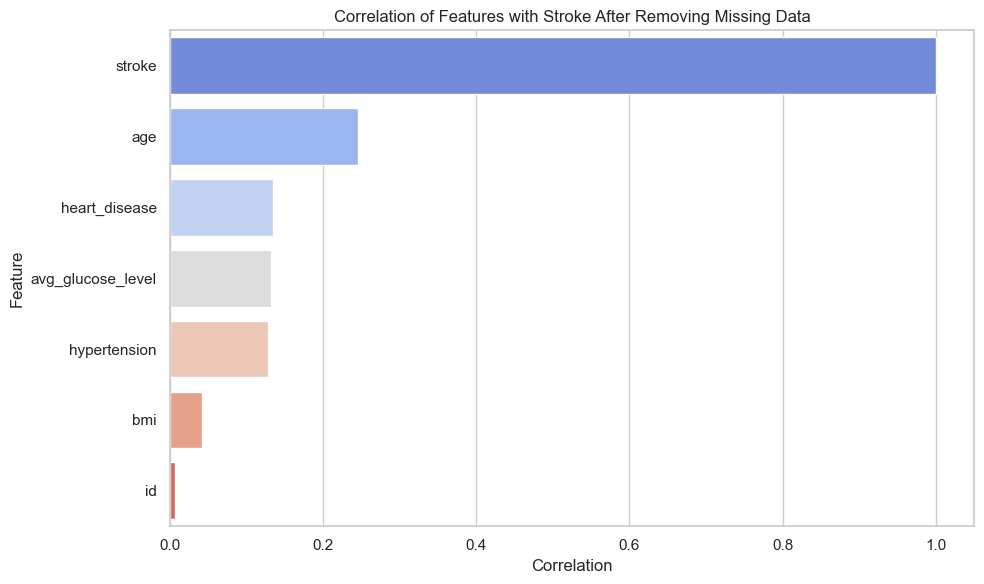

In [308]:
##checking to see if other values are affected

# Plot the correlation values as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_stroke.values,
    y=correlation_with_stroke.index,
    palette='coolwarm'
)
plt.title('Correlation of Features with Stroke After Removing Missing Data')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Decision:Dropping the missing values 
We evaluated three approaches for handling missing BMI values: filling with the mean, filling with the median, and dropping rows entirely. mean and median   weakened the correlation between BMI and stroke.
Dropping rows with missing BMI values preserved the strongest correlation, indicating that the true relationship is better maintained.
Since the proportion of missing data was small, we chose to drop these rows for cleaner, more accurate modeling.

In [309]:
df_clean = df.dropna(subset=['bmi']).copy()
#didnt overwrite the original df (may need it later)


In [311]:
print("Missing values remaining:\n", df_clean.isnull().sum())


Missing values remaining:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64
